In [1711]:
from bs4 import BeautifulSoup
import requests

# URL
url = 'https://espndeportes.espn.com/futbol/equipo/plantel/_/id/176/liga/FRA.1/temporada/2022'

# Headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the page
response = requests.get(url, headers=headers)
if response.status_code != 200:
    print(f"Failed to fetch the page: {response.status_code}")
    exit()

# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Find tables
tables = soup.find_all('table', {'class': 'Table'})

players = []

# Loop through tables
for index, table in enumerate(tables):
    rows = table.find_all('tr')[1:]  # Skip the header row

    # Goalkeeper table (15 columns)
    if index == 0:  # First table
        for row in rows:
            cols = row.find_all('td')
            player = {
                'Name': cols[0].text.strip(),
                'Position': cols[1].text.strip(),
                'Age': cols[2].text.strip(),
                'Height': cols[3].text.strip(),
                'Weight': cols[4].text.strip(),
                'Nationality': cols[5].text.strip(),
                'Appearances': cols[6].text.strip(),
                'Substitute Appearances': cols[7].text.strip(),
                'Assists': cols[8].text.strip(),
                'Goals Conceded': cols[9].text.strip(),
                'Saves': cols[10].text.strip(),
                'Fouls Committed': cols[11].text.strip(),
                'Fouls Suffered': cols[12].text.strip(),
                'Yellow Cards': cols[13].text.strip(),
                'Red Cards': cols[14].text.strip(),
            }
            players.append(player)

    # Other players table (16 columns)
    elif index == 1:  # Second table
        for row in rows:
            cols = row.find_all('td')
            player = {
                'Name': cols[0].text.strip(),
                'Position': cols[1].text.strip(),
                'Age': cols[2].text.strip(),
                'Height': cols[3].text.strip(),
                'Weight': cols[4].text.strip(),
                'Nationality': cols[5].text.strip(),
                'Appearances': cols[6].text.strip(),
                'Substitute Appearances': cols[7].text.strip(),
                'Goals': cols[8].text.strip(),
                'Assists': cols[9].text.strip(),
                'Shots': cols[10].text.strip(),
                'Shots on Target': cols[11].text.strip(),
                'Fouls Committed': cols[12].text.strip(),
                'Fouls Suffered': cols[13].text.strip(),
                'Yellow Cards': cols[14].text.strip(),
                'Red Cards': cols[15].text.strip(),
            }
            players.append(player)

# Display the results
for player in players:
    print(player)


{'Name': 'Simon Ngapandouentnbu1', 'Position': 'G', 'Age': '21', 'Height': '1.85 m', 'Weight': '73 kg', 'Nationality': 'Camerún', 'Appearances': '0', 'Substitute Appearances': '0', 'Assists': '0', 'Goals Conceded': '0', 'Saves': '0', 'Fouls Committed': '0', 'Fouls Suffered': '0', 'Yellow Cards': '0', 'Red Cards': '0'}
{'Name': 'Rubén Blanco36', 'Position': 'G', 'Age': '29', 'Height': '1.88 m', 'Weight': '68 kg', 'Nationality': 'España', 'Appearances': '6', 'Substitute Appearances': '0', 'Assists': '6', 'Goals Conceded': '4', 'Saves': '0', 'Fouls Committed': '0', 'Fouls Suffered': '1', 'Yellow Cards': '0', 'Red Cards': '0'}
{'Name': 'Eric Bailly3', 'Position': 'D', 'Age': '30', 'Height': '1.88 m', 'Weight': '77 kg', 'Nationality': 'Costa de Marfil', 'Appearances': '17', 'Substitute Appearances': '12', 'Goals': '0', 'Assists': '0', 'Shots': '3', 'Shots on Target': '0', 'Fouls Committed': '9', 'Fouls Suffered': '5', 'Yellow Cards': '1', 'Red Cards': '0'}
{'Name': 'Samuel Gigot4', 'Positio

In [1712]:
# Convert to Pandas DataFrame
import pandas as pd
df = pd.DataFrame(players)
display(df)

,Name,Position,Age,Height,Weight,Nationality,Appearances,Substitute Appearances,Assists,Goals Conceded,Saves,Fouls Committed,Fouls Suffered,Yellow Cards,Red Cards,Goals,Shots,Shots on Target
0,Simon Ngapandouentnbu1,G,21,1.85 m,73 kg,Camerún,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,Rubén Blanco36,G,29,1.88 m,68 kg,España,6,0,6,4,0,0,1,0,0,NaN,NaN,NaN
2,Eric Bailly3,D,30,1.88 m,77 kg,Costa de Marfil,17,12,0,NaN,NaN,9,5,1,0,0,3,0
3,Samuel Gigot4,D,31,1.88 m,83 kg,Francia,26,2,2,NaN,NaN,43,14,4,2,2,12,3
4,Leonardo Balerdi5,D,25,1.88 m,76 kg,Argentina,35,5,1,NaN,NaN,53,21,9,1,0,11,1
5,Jonathan Clauss7,D,32,1.78 m,68 kg,Francia,34,2,10,NaN,NaN,24,12,1,0,2,48,11
6,Sead Kolasinac23,D,31,1.83 m,83 kg,Bosnia y Herzegovina,33,7,1,NaN,NaN,41,15,3,0,4,22,8
7,Issa Kaboré29,D,23,1.8 m,77 kg,Burkina Faso,22,13,0,NaN,NaN,23,19,1,0,1,8,3
8,Nuno Tavares30,D,24,1.83 m,73 kg,Portugal,31,8,0,NaN,NaN,36,38,6,1,6,62,17
9,Chancel Mbemba99,D,30,1.83 m,81 kg,Congo (Brazzaville),36,4,0,NaN,NaN,18,19,2,0,5,26,9


In [1713]:
# Creating separate DataFrames for Goalkeepers and other players to get rid of NaN Values
goalkeepers = pd.DataFrame([player for player in players if 'Saves' in player])
field_players = pd.DataFrame([player for player in players if 'Goals' in player])

# Show DataFrames separately
display("Goalkeepers Table:")
display(goalkeepers)

display("Field Players Table:")
display(field_players)

'Goalkeepers Table:'

,Name,Position,Age,Height,Weight,Nationality,Appearances,Substitute Appearances,Assists,Goals Conceded,Saves,Fouls Committed,Fouls Suffered,Yellow Cards,Red Cards
0,Simon Ngapandouentnbu1,G,21,1.85 m,73 kg,Camerún,0,0,0,0,0,0,0,0,0
1,Rubén Blanco36,G,29,1.88 m,68 kg,España,6,0,6,4,0,0,1,0,0


'Field Players Table:'

,Name,Position,Age,Height,Weight,Nationality,Appearances,Substitute Appearances,Goals,Assists,Shots,Shots on Target,Fouls Committed,Fouls Suffered,Yellow Cards,Red Cards
0,Eric Bailly3,D,30,1.88 m,77 kg,Costa de Marfil,17,12,0,0,3,0,9,5,1,0
1,Samuel Gigot4,D,31,1.88 m,83 kg,Francia,26,2,2,2,12,3,43,14,4,2
2,Leonardo Balerdi5,D,25,1.88 m,76 kg,Argentina,35,5,0,1,11,1,53,21,9,1
3,Jonathan Clauss7,D,32,1.78 m,68 kg,Francia,34,2,2,10,48,11,24,12,1,0
4,Sead Kolasinac23,D,31,1.83 m,83 kg,Bosnia y Herzegovina,33,7,4,1,22,8,41,15,3,0
5,Issa Kaboré29,D,23,1.8 m,77 kg,Burkina Faso,22,13,1,0,8,3,23,19,1,0
6,Nuno Tavares30,D,24,1.83 m,73 kg,Portugal,31,8,6,0,62,17,36,38,6,1
7,Chancel Mbemba99,D,30,1.83 m,81 kg,Congo (Brazzaville),36,4,5,0,26,9,18,19,2,0
8,Raimane Daou,M,20,--,--,--,--,--,--,--,--,--,--,--,--,--
9,Emran Soglo,M,19,1.78 m,--,Inglaterra,--,--,--,--,--,--,--,--,--,--


In [1714]:
player_names = df["Name"]
player_names 

0     Simon Ngapandouentnbu1
1             Rubén Blanco36
2               Eric Bailly3
3              Samuel Gigot4
4          Leonardo Balerdi5
5           Jonathan Clauss7
6           Sead Kolasinac23
7              Issa Kaboré29
8             Nuno Tavares30
9           Chancel Mbemba99
10              Raimane Daou
11               Emran Soglo
12         Matteo Guendouzi6
13          Azzedine Ounahi8
14           Dimitri Payet10
15               Pau López16
16      Ruslan Malinovskyi18
17        Valentin Rongier21
18         Jordan Veretout27
19            Bartug Elmaz47
20             Amine Harit77
21                  Vitinha9
22            Cengiz Ünder17
23          François Mughe33
24         Esey Gebreyesus37
25          Alexis Sánchez70
Name: Name, dtype: object

#### ASSIST - FOULS

In [1715]:
midfielder_players = player_names.loc[(df['Position'] == "M")]
midfielder_players

10            Raimane Daou
11             Emran Soglo
12       Matteo Guendouzi6
13        Azzedine Ounahi8
14         Dimitri Payet10
15             Pau López16
16    Ruslan Malinovskyi18
17      Valentin Rongier21
18       Jordan Veretout27
19          Bartug Elmaz47
20           Amine Harit77
Name: Name, dtype: object

In [1716]:
import string

midfielder_players = midfielder_players.str.rstrip(string.digits)
midfielder_players = list(midfielder_players)
midfielder_players

['Raimane Daou',
 'Emran Soglo',
 'Matteo Guendouzi',
 'Azzedine Ounahi',
 'Dimitri Payet',
 'Pau López',
 'Ruslan Malinovskyi',
 'Valentin Rongier',
 'Jordan Veretout',
 'Bartug Elmaz',
 'Amine Harit']

In [1717]:
midfielder_players.sort()


In [1718]:
m_assists= df.loc[df["Position"] == "M", "Assists"]
m_assists =m_assists.replace("--",0).astype(float).tolist()
m_assists

[0.0, 0.0, 4.0, 0.0, 3.0, 2.0, 1.0, 2.0, 3.0, 0.0, 0.0]

In [1719]:
m_appearances= df.loc[df["Position"] == "M", "Appearances"]
m_appearances=m_appearances.replace("--",0).astype(float).tolist()
m_appearances



[0.0, 0.0, 33.0, 22.0, 24.0, 33.0, 20.0, 36.0, 38.0, 0.0, 10.0]

In [1720]:
verfification = len(m_assists) == len(midfielder_players) 
verfification 


True

In [1721]:
m_assists  = pd.Series(m_assists)
m_assists

m_appearances  = pd.Series(m_appearances)
m_appearances


index_labels = midfielder_players
m_assists.index = index_labels
m_appearances.index = index_labels

df1=pd.concat({'Assists': m_assists,
               'Appeareances': m_appearances},axis=1)

print("Midfielders - Assists vs Appareances:\n",df1)


Midfielders - Assists vs Appareances:
                     Assists  Appeareances
Amine Harit             0.0           0.0
Azzedine Ounahi         0.0           0.0
Bartug Elmaz            4.0          33.0
Dimitri Payet           0.0          22.0
Emran Soglo             3.0          24.0
Jordan Veretout         2.0          33.0
Matteo Guendouzi        1.0          20.0
Pau López               2.0          36.0
Raimane Daou            3.0          38.0
Ruslan Malinovskyi      0.0           0.0
Valentin Rongier        0.0          10.0


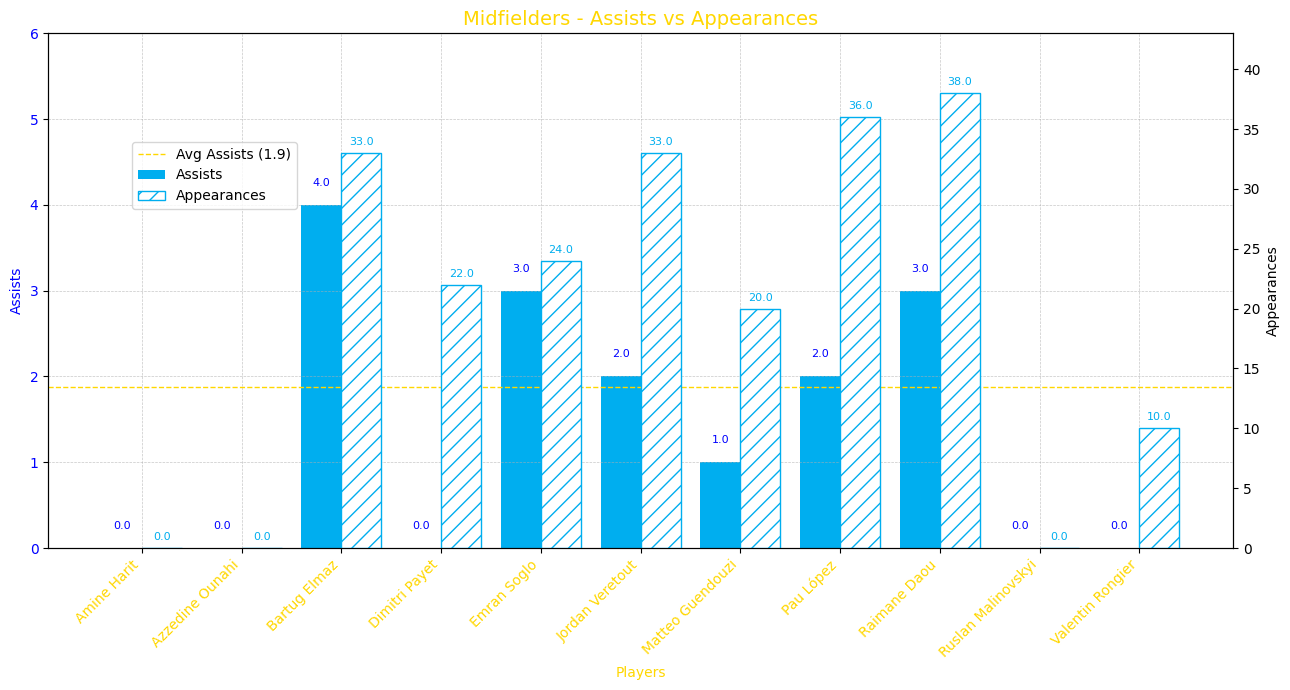

In [ ]:
# Largeur des barres
width = 0.4 

# Générer des indices numériques pour les joueurs
indices = np.arange(len(midfielder_players))

filtered_assists = [assist for assist, appearance in zip(m_assists, m_appearances) if appearance > 0]

# Calculate averages for filtered data
avg_assists = np.mean(filtered_assists)

# Adjust the average box position to avoid overlap
fig, ax1 = plt.subplots(figsize=(13, 7))

# Barres pour les "Assists" (Premier axe Y)
bars1 = ax1.bar(indices - width/2, m_assists, width=width, label='Assists', color='#00AEEF', align='center')  # Bleu ciel
ax1.set_ylabel('Assists', color='blue')
ax1.set_ylim(0, max(m_assists) + 2)
ax1.tick_params(axis='y', labelcolor='blue')

# Barres pour les "Apparitions" (Second axe Y)
ax2 = ax1.twinx()  # Créer un second axe Y
bars2 = ax2.bar(indices + width/2, m_appearances, width=width, label='Appearances', color='white', edgecolor='#00AEEF', align='center', hatch='//')  # Blanc avec bordures bleues
ax2.set_ylabel('Appearances', color='black')
ax2.set_ylim(0, max(m_appearances) + 5)
ax2.tick_params(axis='y', labelcolor='black')

# Ajouter les valeurs au sommet des barres
for bar, value in zip(bars1, m_assists):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{value}', ha='center', va='bottom', fontsize=8, color='blue')

for bar, value in zip(bars2, m_appearances):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value}', ha='center', va='bottom', fontsize=8, color='#00AEEF')

# Ajouter une ligne pour la moyenne des Assists
ax1.axhline(avg_assists, color='black', linestyle='--', linewidth=1, label=f'Avg Assists ({avg_assists:.1f})')


# Configurer les ticks de l'axe X avec les noms des joueurs
ax1.set_xticks(indices)
ax1.set_xticklabels(midfielder_players, rotation=45, ha='right', color='black')  # Noms des joueurs en or
ax1.set_xlabel('Players', color='#FFD700')

# Ajouter une grille discrète pour améliorer la lisibilité
ax1.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Ajouter un titre avec un style cohérent
plt.title('Midfielders - Assists vs Appearances', fontsize=14, color='black')

# Ajuster la mise en page
fig.tight_layout()

# Ajouter une légende
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.8))

# Afficher le graphique
plt.show()






#### MITFIELDER - FOULS

In [1723]:

midfielder_players = player_names.loc[(df['Position'] == "M")]
midfielder_players

10            Raimane Daou
11             Emran Soglo
12       Matteo Guendouzi6
13        Azzedine Ounahi8
14         Dimitri Payet10
15             Pau López16
16    Ruslan Malinovskyi18
17      Valentin Rongier21
18       Jordan Veretout27
19          Bartug Elmaz47
20           Amine Harit77
Name: Name, dtype: object

In [1724]:
import string

midfielder_players = midfielder_players.str.rstrip(string.digits)
midfielder_players = list(midfielder_players)
midfielder_players



['Raimane Daou',
 'Emran Soglo',
 'Matteo Guendouzi',
 'Azzedine Ounahi',
 'Dimitri Payet',
 'Pau López',
 'Ruslan Malinovskyi',
 'Valentin Rongier',
 'Jordan Veretout',
 'Bartug Elmaz',
 'Amine Harit']

In [1725]:
m_Fouls_Suffered = df.loc[df["Position"] == "M", "Fouls Suffered"]
m_Fouls_Suffered = m_Fouls_Suffered.replace("--",0)
m_Fouls_Suffered

10     0
11     0
12    36
13    27
14    19
15     6
16    19
17    29
18    24
19     0
20    13
Name: Fouls Suffered, dtype: object

In [1726]:
m_Fouls_Suffered = m_Fouls_Suffered.replace("--", "0").astype(float).tolist()
m_Fouls_Suffered


[0.0, 0.0, 36.0, 27.0, 19.0, 6.0, 19.0, 29.0, 24.0, 0.0, 13.0]

In [1727]:
m_Fouls_Committed = df.loc[df["Position"] == "M", "Fouls Committed"]
m_Fouls_Committed = m_Fouls_Committed.replace("--", "0").astype(float).tolist()
m_Fouls_Committed 

[0.0, 0.0, 24.0, 10.0, 4.0, 2.0, 28.0, 52.0, 35.0, 0.0, 2.0]

In [1728]:
verfification = len(midfielder_players) == len(m_Fouls_Committed) == len(m_Fouls_Suffered)
verfification 


True

In [1729]:
m_Fouls_Committed  = pd.Series(m_Fouls_Committed)
m_Fouls_Suffered = pd.Series(m_Fouls_Suffered)


index_labels = midfielder_players

m_Fouls_Committed.index = index_labels
m_Fouls_Suffered.index = index_labels

df2=pd.concat({'Fouls Committed': m_Fouls_Committed,
              'Fouls Suffered': m_Fouls_Suffered},axis=1)

print("Midfielder - Fouls Committed/Suffered:\n",df2)




Midfielder - Fouls Committed/Suffered:
                     Fouls Committed  Fouls Suffered
Raimane Daou                    0.0             0.0
Emran Soglo                     0.0             0.0
Matteo Guendouzi               24.0            36.0
Azzedine Ounahi                10.0            27.0
Dimitri Payet                   4.0            19.0
Pau López                       2.0             6.0
Ruslan Malinovskyi             28.0            19.0
Valentin Rongier               52.0            29.0
Jordan Veretout                35.0            24.0
Bartug Elmaz                    0.0             0.0
Amine Harit                     2.0            13.0


In [1730]:
print(type(m_Fouls_Committed))

<class 'pandas.core.series.Series'>


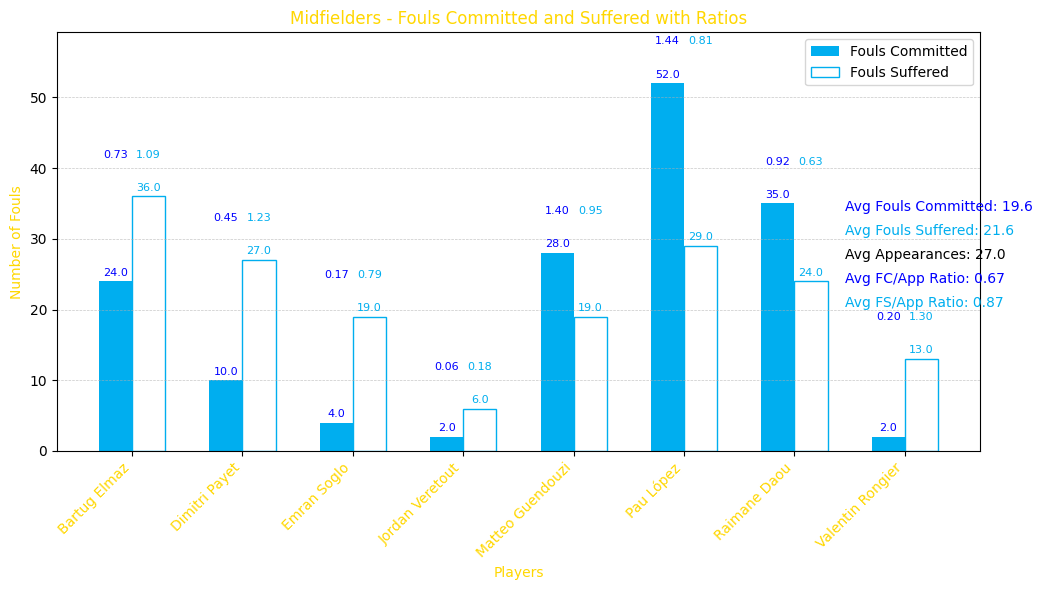

In [1731]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(136)
import seaborn as sns
import pandas as pd 

midfielder_players.sort()

# Unpack filtered data
filtered_players, filtered_fc, filtered_fs, filtered_app = zip(*filtered_data)

# Calculate ratios and averages
ratios_fc = [fc / app for fc, app in zip(filtered_fc, filtered_app)]
ratios_fs = [fs / app for fs, app in zip(filtered_fs, filtered_app)]

avg_fc = np.mean(filtered_fc)
avg_fs = np.mean(filtered_fs)
avg_app = np.mean(filtered_app)
avg_ratio_fc = np.mean(ratios_fc)
avg_ratio_fs = np.mean(ratios_fs)

# Indices for players (X-axis)
indices = np.arange(len(filtered_players))
width = 0.3
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(136)
import seaborn as sns
import pandas as pd 

midfielder_players.sort()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for fouls committed and suffered
bars_fc = ax.bar(indices - width/2, filtered_fc, width=width, label='Fouls Committed', color='#00AEEF')
bars_fs = ax.bar(indices + width/2, filtered_fs, width=width, label='Fouls Suffered', color='white', edgecolor='#00AEEF')

# Annotate fouls committed and suffered
for bar, value in zip(bars_fc, filtered_fc):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(value), ha='center', va='bottom', fontsize=8, color='blue')

for bar, value in zip(bars_fs, filtered_fs):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(value), ha='center', va='bottom', fontsize=8, color='#00AEEF')

# Add ratios above bars
spacing = max(filtered_fc + filtered_fs) * 0.1  # Dynamic adjustment
for idx, (fc_ratio, fs_ratio) in enumerate(zip(ratios_fc, ratios_fs)):
    ax.text(indices[idx] - width/2, max(filtered_fc[idx], filtered_fs[idx]) + spacing, f"{fc_ratio:.2f}",
            ha='center', va='bottom', fontsize=8, color='blue')
    ax.text(indices[idx] + width/2, max(filtered_fc[idx], filtered_fs[idx]) + spacing, f"{fs_ratio:.2f}",
            ha='center', va='bottom', fontsize=8, color='#00AEEF')

# Add color-coded averages on the right
plt.gcf().text(0.85, 0.64, f"Avg Fouls Committed: {avg_fc:.1f}", fontsize=10, color='blue')
plt.gcf().text(0.85, 0.60, f"Avg Fouls Suffered: {avg_fs:.1f}", fontsize=10, color='#00AEEF')
plt.gcf().text(0.85, 0.56, f"Avg Appearances: {avg_app:.1f}", fontsize=10, color='black')
plt.gcf().text(0.85, 0.52, f"Avg FC/App Ratio: {avg_ratio_fc:.2f}", fontsize=10, color='blue')
plt.gcf().text(0.85, 0.48, f"Avg FS/App Ratio: {avg_ratio_fs:.2f}", fontsize=10, color='#00AEEF')

# Configure X-axis with player names
ax.set_xticks(indices)
ax.set_xticklabels(filtered_players, rotation=45, ha='right', color='#FFD700')
ax.set_xlabel('Players', color='#FFD700')

# Configure Y-axis
ax.set_ylabel('Number of Fouls', color='#FFD700')
ax.set_ylim(0, max(max(filtered_fc), max(filtered_fs)) + spacing + 2)

# Add title
plt.title('Midfielders - Fouls Committed and Suffered with Ratios', fontsize=12, color='#FFD700')

# Add grid and legend
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

# Adjust layout and show plot
fig.tight_layout()
plt.show()


















